# Unsupervised Learning

## Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Standard data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#visualisasi
import seaborn as sns

#data preprocessing - standardisasi
from sklearn.preprocessing import StandardScaler

#agglomerative
from sklearn.cluster import AgglomerativeClustering

#menentukan jumlah cluster
from sklearn.metrics import silhouette_score

%matplotlib inline

## Clustering Agglomerative Clustering

### Load Dataset

In [ ]:
# Import data dari CSV ke dataframe
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='petal_length'>

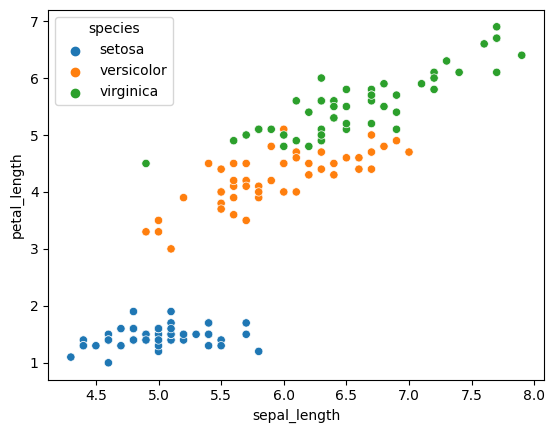

In [ ]:
#Scatterplot visualisasi
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

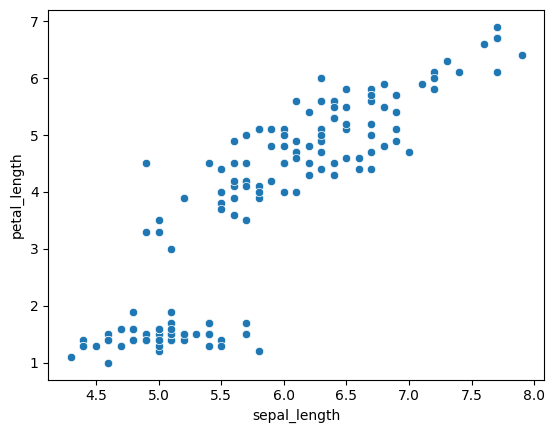

In [ ]:
sns.scatterplot(data=df, x='sepal_length', y='petal_length')

### Standardisasi Fitur

In [ ]:
feats = ['sepal_length', 'petal_length']
X = df[feats].values
y = df['species'].values

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,sepal_length,petal_length
count,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-4.263256e-16
std,1.003350e+00,1.003350e+00
min,-1.870024e+00,-1.567576e+00
25%,-9.006812e-01,-1.226552e+00
50%,-5.250608e-02,3.364776e-01
75%,6.745011e-01,7.627583e-01
max,2.492019e+00,1.785832e+00


### AC

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3) #set jumlah cluster
ac.fit(new_df.values)

AgglomerativeClustering(n_clusters=3)

In [ ]:
ac.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
new_df['target'] = y
new_df['fit'] = ac.labels_

<Axes: xlabel='sepal_length', ylabel='petal_length'>

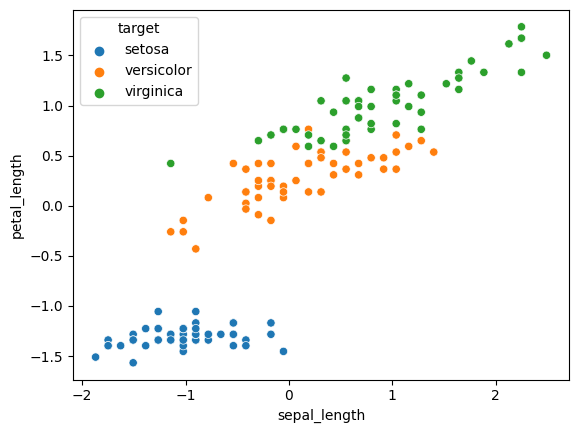

In [ ]:
sns.scatterplot(data=new_df, x='sepal_length', y='petal_length',
                hue='target')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

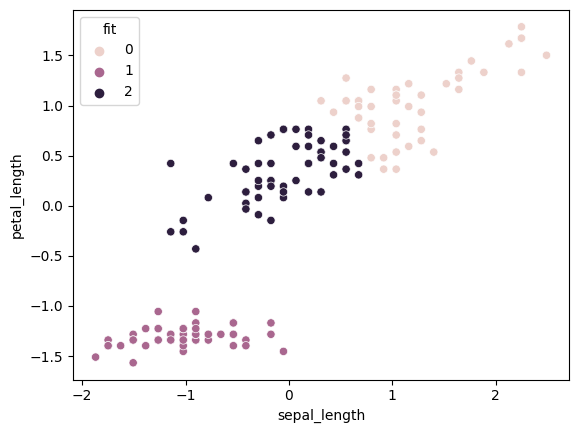

In [ ]:
sns.scatterplot(data=new_df, x='sepal_length', y='petal_length',
                hue='fit')

In [ ]:
df['fit'] = ac.labels_
df.groupby('fit').agg(['mean', 'median', 'std'])

sepal_length                  sepal_width                  petal_length  \
            mean median       std        mean median       std         mean   
fit                                                                           
0       6.826667    6.7  0.460435    3.060000    3.0  0.274193     5.564444   
1       5.006000    5.0  0.352490    3.428000    3.4  0.379064     1.462000   
2       5.800000    5.8  0.386820    2.718182    2.7  0.296954     4.367273   

                     petal_width                   
    median       std        mean median       std  
fit                                                
0      5.6  0.615761    1.968889    2.0  0.352795  
1      1.5  0.173664    0.246000    0.2  0.105386  
2      4.5  0.532657    1.436364    1.4  0.315268

## Clustering Kmeans

### Load Dataset

In [2]:
# Import data dari CSV ke dataframe
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='petal_length'>

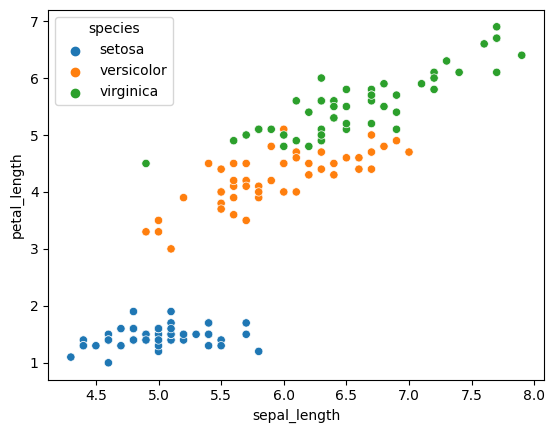

In [3]:
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

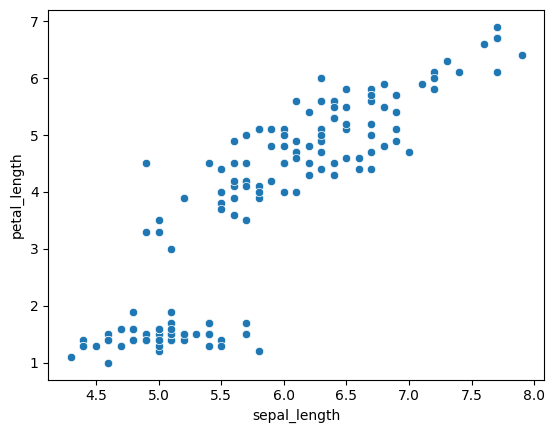

In [4]:
sns.scatterplot(data=df, x='sepal_length', y='petal_length')

### Standardisasi Fitur

In [5]:
feats = ['sepal_length', 'petal_length']
X = df[feats].values
y = df['species'].values

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,sepal_length,petal_length
count,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-4.263256e-16
std,1.003350e+00,1.003350e+00
min,-1.870024e+00,-1.567576e+00
25%,-9.006812e-01,-1.226552e+00
50%,-5.250608e-02,3.364776e-01
75%,6.745011e-01,7.627583e-01
max,2.492019e+00,1.785832e+00


### Kmeans

#### Elbow method

[84.72073862193372, 43.03469199603467, 28.486372225447568, 22.395986080151943, 16.84719929046285, 13.901730890346665, 12.009286508360827, 9.923662918297666, 8.404028577117842]


<Axes: >

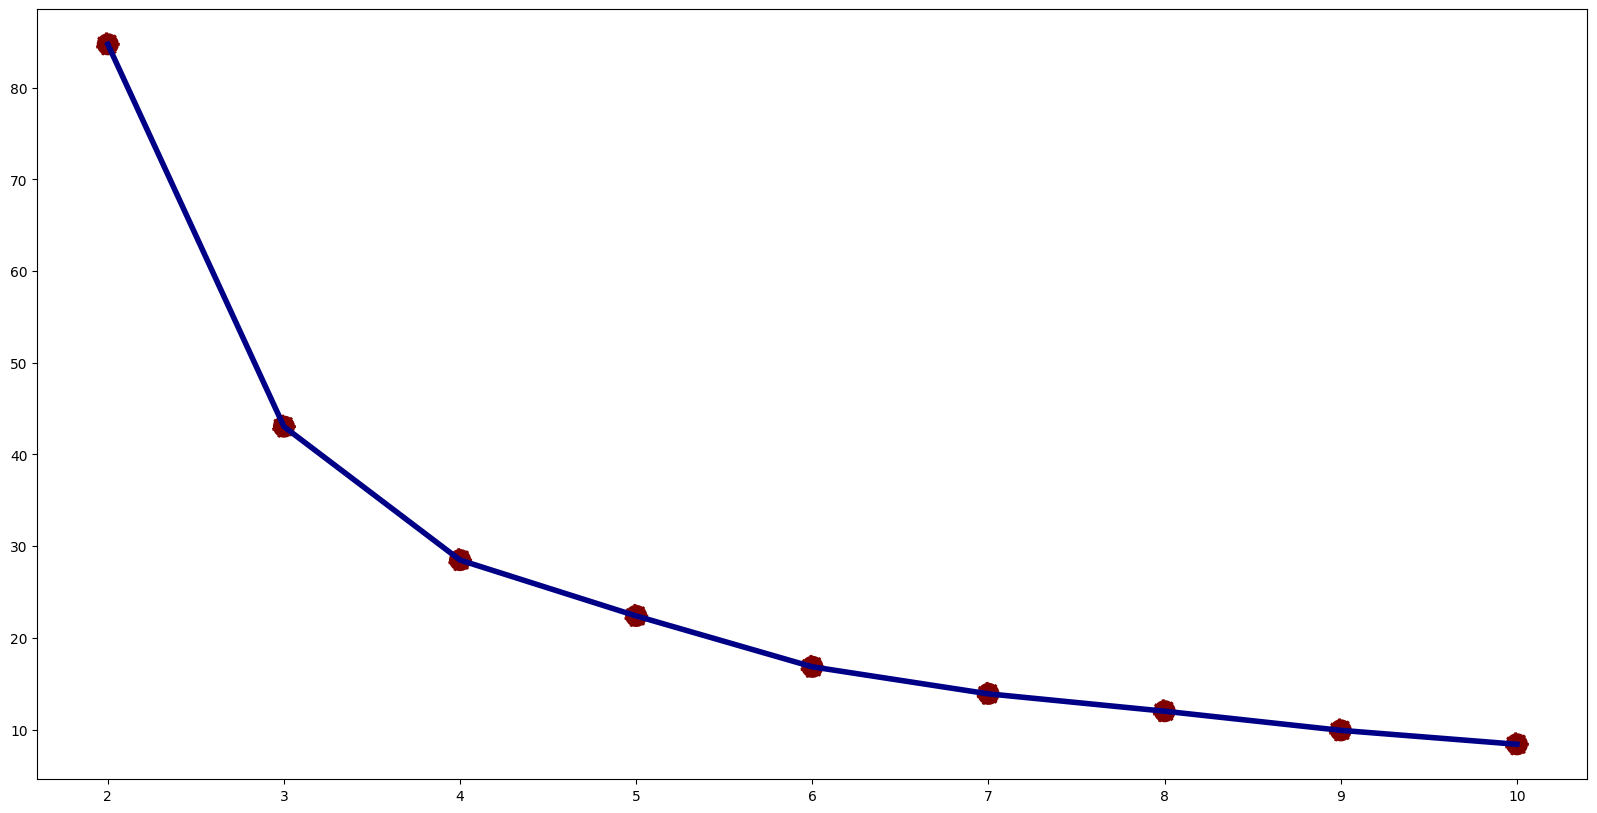

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_df.values)
    inertia.append(kmeans.inertia_)

print(inertia)


#Visualisasi Inertia
plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
# Hitung selisih intertia antar cluster
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    49.204064
1    33.806027
2    21.379999
3    24.775809
4    17.483431
5    13.613013
6    17.366757
7    15.313240
8          NaN
dtype: float64

#### Shilouette Score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(3,15))
print(range_n_clusters)

new_df = pd.DataFrame(data = X_std, columns = feats)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
# Shilouette score
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(X_std)
    preds = kmeans.predict(new_df)

    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

ValueError: ignored

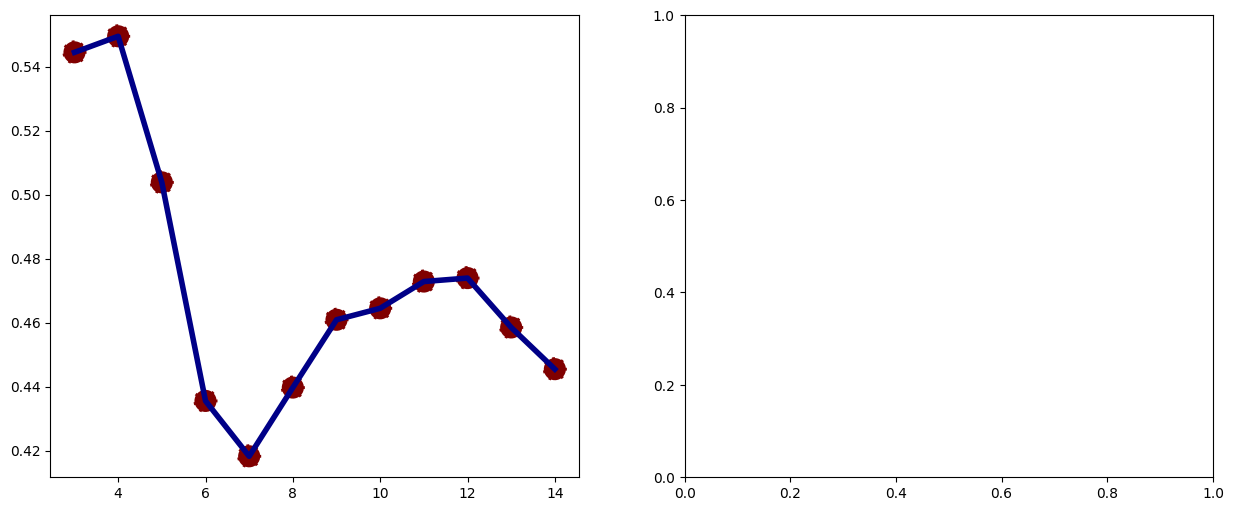

In [ ]:
#Visualisasi Shilouette Score
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.lineplot(x=range(3,15), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4, ax=ax[0])
sns.scatterplot(x=range(3,15), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--',ax=ax[0])

sns.lineplot(x=range(3, 15), y=inertia, color='#000087', linewidth = 4,ax=ax[1])
sns.scatterplot(x=range(3, 15), y=inertia, s=300, color='#800000',  linestyle='--', ax=ax[1])

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) #Set jumlah cluster
kmeans.fit(new_df.values)

KMeans(n_clusters=3, random_state=0)

In [7]:
#Memasukkan target(species beneran), dan data cluster hasil modelling
new_df['target'] = y
new_df['cluster'] = kmeans.labels_

<Axes: xlabel='sepal_length', ylabel='petal_length'>

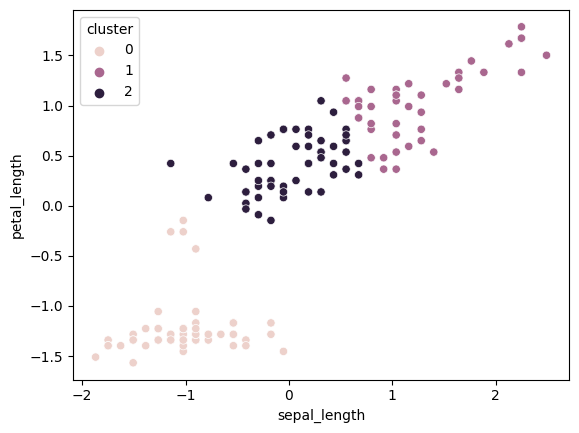

In [8]:
#Visualisasi hasil modelling
sns.scatterplot(data=new_df, x='sepal_length', y='petal_length',
                hue='cluster')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

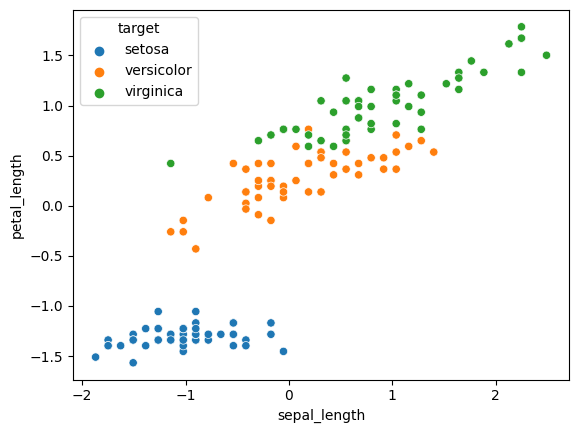

In [ ]:
#Visualisasi data sebenarnya
sns.scatterplot(data=new_df, x='sepal_length', y='petal_length',
                hue='target')

In [ ]:
#Menunjukkan centroid dari kmeans
kmeans.cluster_centers_

array([[ 1.22961906,  1.02844019],
       [-1.01511749, -1.22865676],
       [ 0.03665519,  0.41744409]])

In [ ]:
#Memasukkan hasil clustering ke data
df['cluster'] = kmeans.labels_

In [ ]:
#Deskriptif stats dari modelling kmeans
df['fit'] = kmeans.labels_
df[['sepal_length', 'petal_length', 'fit']].groupby('fit').agg(['mean', 'median', 'std'])

sepal_length                  petal_length                 
            mean median       std         mean median       std
fit                                                            
0       6.858140    6.7  0.446272     5.567442    5.6  0.629709
1       5.005556    5.0  0.339487     1.596296    1.5  0.509888
2       5.873585    5.9  0.324127     4.492453    4.5  0.483914

1. Untuk Cluster 1 rata-rata sepal length 6.8
2. Untuk Cluster 2 rata-rata sepal length 5
2. Untuk Cluster 3 rata-rata sepal length 5.8

1. Untuk Cluster 1 rata-rata monetary 1jt
2. Untuk Cluster 2 rata-rata monetarynya 4jt
2. Untuk Cluster 3 rata-rata monetarynya 10jt

1. Untuk Cluster 1 rata-rata frequency 10x
2. Untuk Cluster 2 rata-rata frequencynya 5x
2. Untuk Cluster 3 rata-rata f = 3x


Cluster 1 adalah member yang beli murah tapi sering --> Voucher untuk belanja lebih mahal (discount)
Cluster 3 adalah member yang xxxx --> voucher cashback

# Test Yourself

In [ ]:
from vega_datasets import data
df = data.cars()

In [ ]:
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
